## Titanic dataset

We are going to look the attributes and properties of titanic members and see what we can get from this dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #add seaborn for better visualization

## Read datset

In [3]:
train=pd.read_csv(r"../input/titanic-machine-learning-from-disaster/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset = pd.DataFrame(train.dtypes)
dataset

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


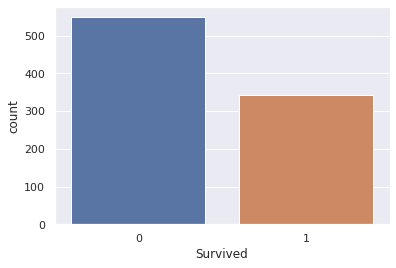

In [7]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Survived",data = train)

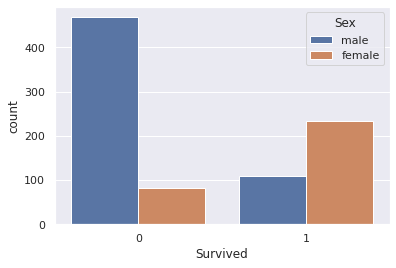

In [8]:
ax = sns.countplot(x="Survived",hue="Sex",data = train)

## Find null or missing values

In [9]:
#check is there any missing values in here
dataset["Missing value"]=train.isnull().sum()
dataset

,0,Missing value
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [10]:
dataset["Count"] = train.count()
dataset

,0,Missing value,Count
PassengerId,int64,0,891
Survived,int64,0,891
Pclass,int64,0,891
Name,object,0,891
Sex,object,0,891
Age,float64,177,714
SibSp,int64,0,891
Parch,int64,0,891
Ticket,object,0,891
Fare,float64,0,891


In [11]:
dataset=dataset.rename(columns={0:'DataType'})
dataset

,DataType,Missing value,Count
PassengerId,int64,0,891
Survived,int64,0,891
Pclass,int64,0,891
Name,object,0,891
Sex,object,0,891
Age,float64,177,714
SibSp,int64,0,891
Parch,int64,0,891
Ticket,object,0,891
Fare,float64,0,891


## Processing testing data

In [12]:
test=pd.read_csv(r"../input/titanic-machine-learning-from-disaster/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.shape

(418, 11)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data visualizaion for conclusion

<AxesSubplot:xlabel='Survived', ylabel='count'>

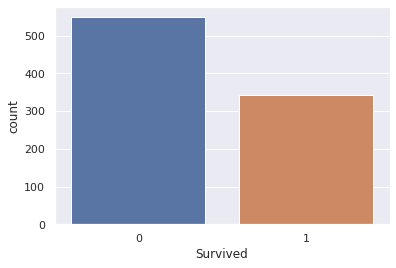

In [16]:
sns.countplot(x="Survived",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

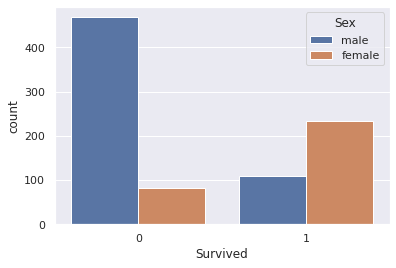

In [17]:
sns.countplot(x="Survived",hue="Sex",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

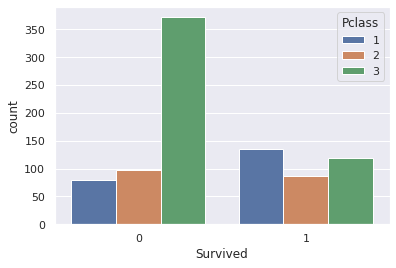

In [18]:
sns.countplot(x="Survived",hue="Pclass",data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

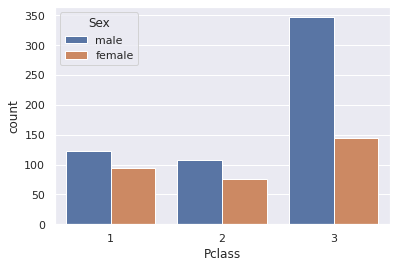

In [19]:
sns.countplot(x="Pclass",hue="Sex",data=train)

Mid observations

1) We can see female had a higher survived rate rather then male.

2) We can see people in Pclass - 1 has a higher survied rate rather then other Pclasses.

3) The number of male in Pclass-3 supered the number of feamle. This might be a reason why male's survived rate was lower then female's rate.

<AxesSubplot:xlabel='Survived', ylabel='count'>

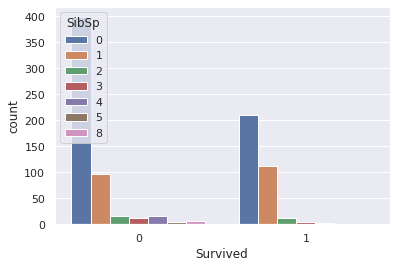

In [20]:
sns.countplot(x="Survived",hue="SibSp",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

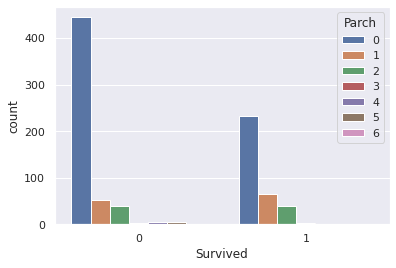

In [21]:
sns.countplot(x="Survived",hue="Parch",data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

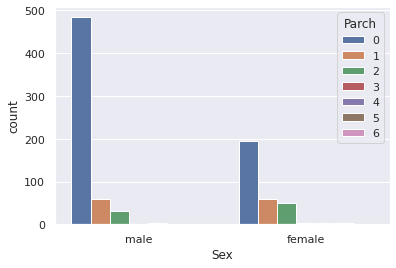

In [22]:
sns.countplot(x="Sex",hue="Parch",data=train)

Mid observations

1) People who do not have family or siblings were more likely to survive.

2) However, the one who does not have sibilings or family were mostly male. But, suprisingly, male's casualty was higher then female's one.

<AxesSubplot:xlabel='Survived', ylabel='count'>

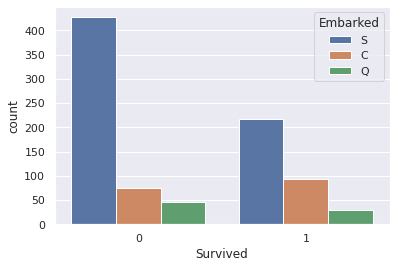

In [23]:
sns.countplot(x="Survived",hue="Embarked",data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

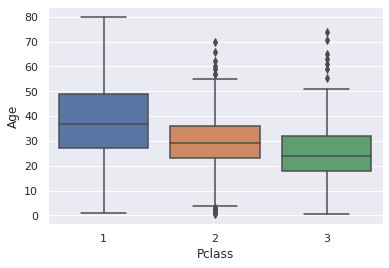

In [24]:
sns.boxplot(x="Pclass",y="Age",data=train)

Mid observation

1) People who embarked from S had higher survived rate compared to others.

2) People who embarked from S were usually more older then others.

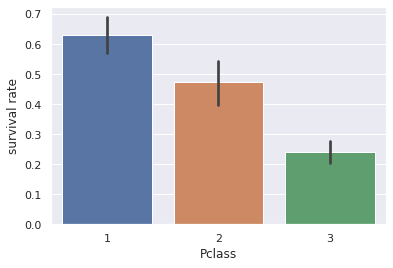

In [25]:
sns.barplot(x="Pclass",y="Survived",data=train)
plt.ylabel("survival rate")
plt.xlabel("Pclass")
plt.show()

## Dealing with null values

Now, I am going to do 2 ways to dealing with these null values

First, **Age** is dealed with by the strategy shown from [YLT609](https://www.kaggle.com/ylt0609/3-strategies-analyzing-age-and-their-impact). Simply just removing age features which gives more percise outputs.

Second, **Cabin** is important said by many others. But, it is so robust that I have no idea how to deal with using Cabin. So I am going to simply remove cabin features.


## Dealing with Missing Ages

<AxesSubplot:>

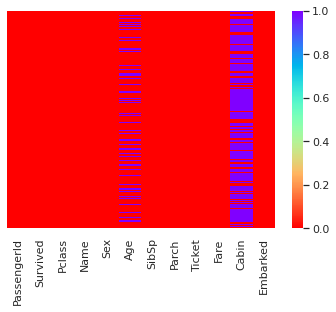

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap="rainbow_r")

In [27]:
#dropping the column cabin and age
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)
train.drop("Age",axis=1,inplace=True)
test.drop("Age",axis=1,inplace=True)
train.drop("Fare",axis=1,inplace=True)
test.drop("Fare",axis=1,inplace=True)

In [28]:
train["Embarked"].fillna(train["Embarked"].value_counts().index[0], inplace=True)

<AxesSubplot:>

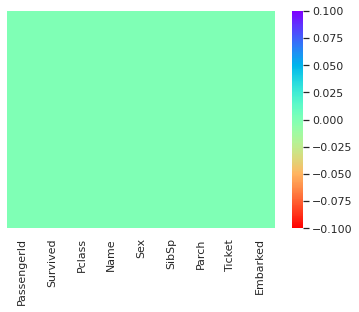

In [29]:
# check if there is any other null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap="rainbow_r")

In [30]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [31]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

## Categorical to numerical columns

In [32]:
sex = pd.get_dummies(train["Sex"])
sex1 = pd.get_dummies(test["Sex"])

embarked = pd.get_dummies(train["Embarked"])
embarked1 = pd.get_dummies(test["Embarked"])

In [33]:
train=pd.concat([train,sex,embarked],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,0,1,0,0,1


In [34]:
train.drop(["Sex","Embarked","Ticket","Name"],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,female,male,C,Q,S
0,1,0,3,1,0,0,1,0,0,1
1,2,1,1,1,0,1,0,1,0,0
2,3,1,3,0,0,1,0,0,0,1
3,4,1,1,1,0,1,0,0,0,1
4,5,0,3,0,0,0,1,0,0,1


In [35]:
test=pd.concat([test,sex1,embarked1],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",male,0,0,330911,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,S,1,0,0,0,1


In [36]:
test.drop(["Sex","Embarked","Ticket","Name"],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,SibSp,Parch,female,male,C,Q,S
0,892,3,0,0,0,1,0,1,0
1,893,3,1,0,1,0,0,0,1
2,894,2,0,0,0,1,0,1,0
3,895,3,0,0,0,1,0,0,1
4,896,3,1,1,1,0,0,0,1


## Split the dat for test

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train.drop("Survived",axis=1),train["Survived"],test_size=0.2,random_state=5)

## Logistic Regression

In [38]:
#import packages
from sklearn.linear_model import LogisticRegression
#call the function
model1=LogisticRegression(max_iter=1000)
#train it
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
pred1=model1.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy1=accuracy_score(y_test,pred1)
accuracy1

0.8156424581005587

In [41]:
confusion_matrix(y_test,pred1)

array([[99, 12],
       [21, 47]])

## SVM

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()

In [43]:
grid_param = {'C': [0.1,1, 10, 100, 1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),grid_param,verbose=3)

In [44]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [46]:
pred4 = grid.predict(x_test)

In [47]:
accuracy4=accuracy_score(y_test,pred4)
accuracy4

0.7877094972067039

In [48]:
confusion_matrix(y_test,pred4)

array([[95, 16],
       [22, 46]])

In [49]:
test.head()

,PassengerId,Pclass,SibSp,Parch,female,male,C,Q,S
0,892,3,0,0,0,1,0,1,0
1,893,3,1,0,1,0,0,0,1
2,894,2,0,0,0,1,0,1,0
3,895,3,0,0,0,1,0,0,1
4,896,3,1,1,1,0,0,0,1


In [50]:
final_pred = model1.predict(test)
final_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
test['Survived'] = final_pred
test.drop(['Pclass','SibSp','Parch','female','male','C','Q','S'],inplace=True,axis=1)
test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
test.to_csv('submission_titanic.csv', index=False)